In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("spam.csv", encoding="latin-1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#rename 
data.rename(columns = {'v1' :'class','v2':'message'}, inplace = True)

In [8]:
data

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ï¿½_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
data['class']=data['class'].map({'ham':0, 'spam':1})

In [10]:
data.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X=data['message']
y=data['class']

In [12]:
X.shape

(5572,)

In [13]:
y.shape

(5572,)

In [14]:
data.isnull().sum()

class      0
message    0
dtype: int64

In [15]:
cv=CountVectorizer()

In [16]:
X=cv.fit_transform(X)

In [17]:
x_train, x_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
x_train.shape

(4457, 8710)

In [18]:
x_test.shape

(1115, 8710)

In [19]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [20]:
model.fit(x_train, y_train)

MultinomialNB()

In [21]:
model.score(x_test, y_test)

0.979372197309417

In [22]:
msg="You Won 500$"
data = [msg]
vect = cv.transform(data).toarray()
my_prediction = model.predict(vect)

In [23]:
vect

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
import pickle
pickle.dump(model, open('spam.pkl','wb'))
model1 = pickle.load(open('spam.pkl','rb'))

# Check SPAM or HAM

In [25]:
from win32com.client import Dispatch

In [26]:
def speak(text):
	speak=Dispatch(("SAPI.SpVoice"))
	speak.Speak(text)

In [27]:
def result(msg):
    data = [msg]
    vect = cv.transform(data).toarray()
    my_prediction = model1.predict(vect)
    if my_prediction[0]==1:
        speak("This is a Spam mail")
        print("This is a Spam mail")
    else:
        speak("This is not a Spam mail")
        print("This is not a Spam mail")

In [28]:
import tkinter as tk

In [29]:
root=tk.Tk()
root.geometry("200x200")
l2=tk.Label(root, text="Email Spam Classification Application")
l2.pack()
l1=tk.Label(root, text="Enter Your Message:")
l1.pack()
text=tk.Entry(root)
text.pack()
def result():
    data = [text.get()]
    vect = cv.transform(data).toarray()
    my_prediction = model1.predict(vect)
    if my_prediction[0]==1:
        speak("This is a Spam mail")
        print("This is a Spam mail")
    else:
        speak("This is not a Spam mail")
        print("This is not a Spam mail")
B=tk.Button(root, text="Click", command=result)
B.pack()

root.mainloop()

This is a Spam mail
This is a Spam mail


In [30]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import numpy as np
from sklearn.preprocessing import label_binarize

In [31]:
#Build a model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)

SVM Classifier:
Accuracy: 0.9802690582959641
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:


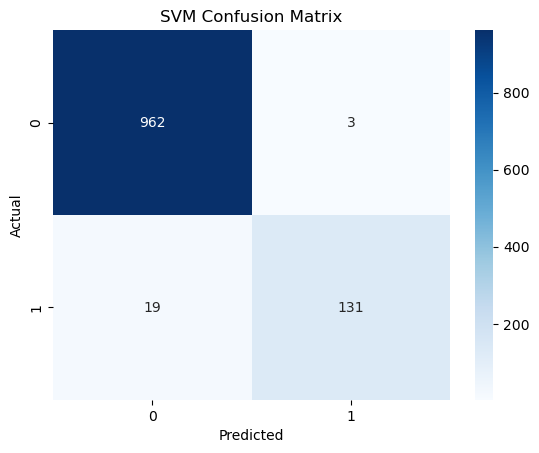

In [32]:
print("SVM Classifier:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred)}")
print("Classification Report:")
print(classification_report(y_test, svm_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()